✅ Loaded 12757 satellites
           Name  Catalog_No                            Epoch
0   CALSPHERE 1         900 2025-09-26 05:34:56.423126+00:00
1   CALSPHERE 2         902 2025-09-26 05:45:28.952332+00:00
2         LCS 1        1361 2025-09-26 05:10:27.820129+00:00
3     TEMPSAT 1        1512 2025-09-25 21:10:59.289886+00:00
4  CALSPHERE 4A        1520 2025-09-26 03:13:35.932220+00:00

Total Satellites: 12757
Unique Catalog IDs: 12757


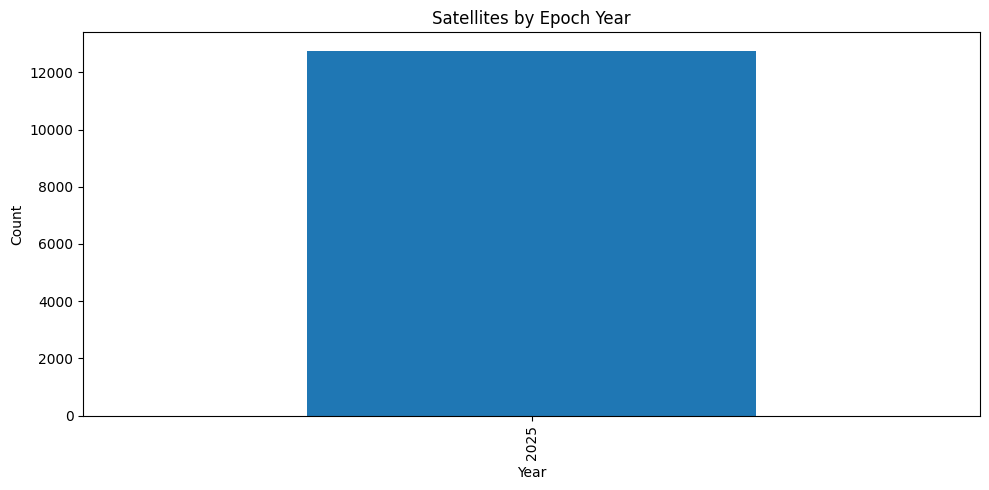


🛰️ Top 10 Latest Satellites by Epoch
               Name  Catalog_No                            Epoch  Year  Month
70       XMM-NEWTON       25989 2025-09-28 01:55:50.355530+00:00  2025      9
65              CXO       25867 2025-09-26 22:17:36.312866+00:00  2025      9
405        SJ-11-03       37730 2025-09-26 08:38:49.259918+00:00  2025      9
7720   SITRO-AIS 27       59068 2025-09-26 08:38:16.306091+00:00  2025      9
1124  YAOGAN-31 01C       43277 2025-09-26 08:37:05.795013+00:00  2025      9
1123  YAOGAN-31 01B       43276 2025-09-26 08:36:58.978088+00:00  2025      9
9781     QIANFAN-42       62243 2025-09-26 08:36:45.726898+00:00  2025      9
1122  YAOGAN-31 01A       43275 2025-09-26 08:36:19.235779+00:00  2025      9
6126   AAC-HSI-SAT2       56995 2025-09-26 08:34:36.431915+00:00  2025      9
1125       WEINA 1B       43279 2025-09-26 08:34:13.727722+00:00  2025      9


In [ ]:
# ------------------------------
#  EDA on TLE Dataset
# ------------------------------

from skyfield.api import load
import pandas as pd
import matplotlib.pyplot as plt
import os

# Ensure outputs folder exists
os.makedirs("outputs", exist_ok=True)

# Load TLE file
tle_path = "data/satellites_active.tle"
stations = load.tle_file(tle_path)
print(f"✅ Loaded {len(stations)} satellites")

# Extract satellite metadata
data = []
for sat in stations:
    try:
        data.append({
            "Name": sat.name,
            "Catalog_No": sat.model.satnum,
            "Epoch": sat.epoch.utc_datetime()
        })
    except Exception as e:
        pass

df = pd.DataFrame(data)
print(df.head())

# ------------------------------
# Basic EDA
# ------------------------------

print("\nTotal Satellites:", len(df))
print("Unique Catalog IDs:", df['Catalog_No'].nunique())

# Epoch distribution
df['Year'] = df['Epoch'].dt.year
df['Month'] = df['Epoch'].dt.month

# Plot number of satellites by year
plt.figure(figsize=(10,5))
df['Year'].value_counts().sort_index().plot(kind='bar')
plt.title("Satellites by Epoch Year")
plt.xlabel("Year")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("outputs/satellites_by_year.png")
plt.show()

# Top 10 recent satellites
print("\n🛰️ Top 10 Latest Satellites by Epoch")
print(df.sort_values("Epoch", ascending=False).head(10))


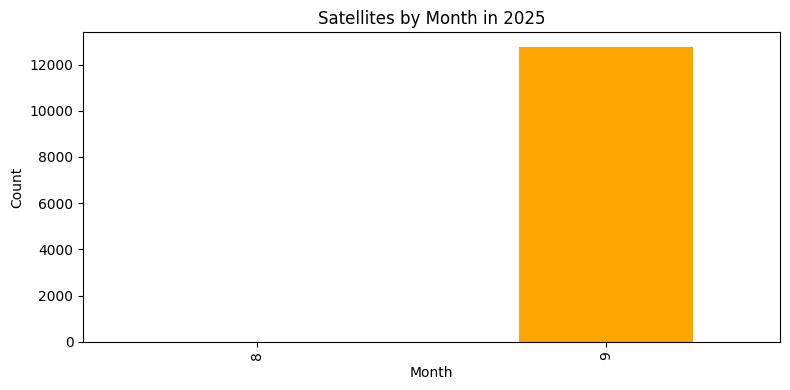

In [2]:
# Satellites per month (for most recent year in dataset)
latest_year = df['Year'].max()
df_latest = df[df['Year'] == latest_year]

plt.figure(figsize=(8,4))
df_latest['Month'].value_counts().sort_index().plot(kind='bar', color='orange')
plt.title(f"Satellites by Month in {latest_year}")
plt.xlabel("Month")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig(f"outputs/satellites_by_month_{latest_year}.png")
plt.show()
